### This script contains the following sections:

#### 1. Importing libraries and data and renaming columns
#### 2. Preprocessing
#### 3. The elbow technique to identify optimum k size
#### 4. k-means clustering 
#### 5. Kmeans Visualizations and comments

## 1. Imports

In [27]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

%matplotlib inline

In [2]:
path = r'C:\Users\\Achievement 6\data_emergency_ex6.1'
data_path = r'C:\Users\\Achievement 6\data_emergency_ex6.1\Data'

In [3]:
#import df
df = pd.read_csv(os.path.join(data_path,'Prepared','3.data_join_facilities.csv'))
df.head(2)

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,549.0,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,8613.0,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0


In [4]:
df.columns

Index(['year', 'oshpd_id', 'county_number', 'county_name', 'facility_name',
       'dba_address1', 'dba_city', 'dba_zip_code', 'license_category_desc',
       'teaching_hospital_desc', 'licensed_bed_size', 'er_service_level',
       'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19',
       'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69',
       'age_70_79', 'age_80_', 'age_under_1', 'age_unknown',
       'asian_pacific_island', 'black', 'hispanic', 'native_american_eski',
       'other_race', 'unknown_race', 'white', 'acute_care',
       'against_medical_advice', 'died', 'hospice_care', 'home_health_service',
       'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care',
       'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay',
       'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit'],
      dtype='object')

In [5]:
df.isna().sum()

year                      0
oshpd_id                  0
county_number             0
county_name               0
facility_name             0
dba_address1              0
dba_city                  0
dba_zip_code              0
license_category_desc     0
teaching_hospital_desc    0
licensed_bed_size         0
er_service_level          0
sex_male                  0
sex_female                0
sex_unk                   0
age_01_09                 0
age_10_19                 0
age_20_29                 0
age_30_39                 0
age_40_49                 0
age_50_59                 0
age_60_69                 0
age_70_79                 0
age_80_                   0
age_under_1               0
age_unknown               0
asian_pacific_island      0
black                     0
hispanic                  0
native_american_eski      0
other_race                0
unknown_race              0
white                     0
acute_care                0
against_medical_advice    0
died                

## 2. Preprocessing

In [6]:
#Remove NA values in numeric columns since they are from a similar facility and the column count is very low for NA values
df.dropna(axis = 0, subset = ['ed_admit'], how = 'any', inplace = True)

In [7]:
df.isna().sum()

year                      0
oshpd_id                  0
county_number             0
county_name               0
facility_name             0
dba_address1              0
dba_city                  0
dba_zip_code              0
license_category_desc     0
teaching_hospital_desc    0
licensed_bed_size         0
er_service_level          0
sex_male                  0
sex_female                0
sex_unk                   0
age_01_09                 0
age_10_19                 0
age_20_29                 0
age_30_39                 0
age_40_49                 0
age_50_59                 0
age_60_69                 0
age_70_79                 0
age_80_                   0
age_under_1               0
age_unknown               0
asian_pacific_island      0
black                     0
hispanic                  0
native_american_eski      0
other_race                0
unknown_race              0
white                     0
acute_care                0
against_medical_advice    0
died                

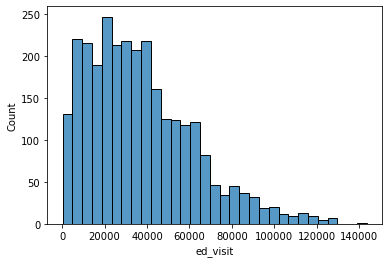

In [8]:
sns.histplot(df['ed_visit']);

In [9]:
#check which hospitals have high ed visits. Do more than on facility have high ed visits?

(df[df['ed_visit'] > 120000])

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
129,2012,106191228,19,Los Angeles,LAC+USC MEDICAL CENTER,1200 NORTH STATE STREET,LOS ANGELES,90033,General Acute Care,1.0,...,38347.0,3984.0,41437.0,4041.0,0.0,3117.0,67300.0,49942.0,24362.0,120359.0
453,2013,106191228,19,Los Angeles,LAC+USC MEDICAL CENTER,1200 NORTH STATE STREET,LOS ANGELES,90033,General Acute Care,1.0,...,41351.0,4625.0,46254.0,4070.0,0.0,3268.0,72299.0,49817.0,22751.0,125384.0
863,2014,106361223,36,San Bernardino,KAISER FOUNDATION HOSPITAL - FONTANA,9961 SIERRA AVENUE,FONTANA,92335,General Acute Care,0.0,...,25894.0,21118.0,342.0,56312.0,20619.0,1076.0,110326.0,12886.0,13615.0,124288.0
1188,2015,106361223,36,San Bernardino,KAISER FOUNDATION HOSPITAL - FONTANA,9961 SIERRA AVENUE,FONTANA,92335,General Acute Care,0.0,...,33614.0,22674.0,538.0,53609.0,17307.0,1055.0,112837.0,13864.0,14235.0,127756.0
1508,2016,106361223,36,San Bernardino,KAISER FOUNDATION HOSPITAL - FONTANA,9961 SIERRA AVENUE,FONTANA,92335,Hospital,0.0,...,41164.0,24019.0,441.0,53625.0,9474.0,1111.0,113739.0,13892.0,15044.0,128742.0
1827,2017,106361223,36,San Bernardino,KAISER FOUNDATION HOSPITAL - FONTANA,9961 SIERRA AVENUE,FONTANA,92335,General Acute Care,0.0,...,41628.0,25517.0,484.0,52600.0,6806.0,1184.0,111941.0,13949.0,15235.0,127074.0
2060,2018,106191228,19,Los Angeles,LAC+USC MEDICAL CENTER,1200 NORTH STATE STREET,LOS ANGELES,90033,General Acute Care,1.0,...,91417.0,9057.0,10515.0,6042.0,8482.0,2985.0,69969.0,52741.0,22297.0,125695.0
2147,2018,106361223,36,San Bernardino,KAISER FOUNDATION HOSPITAL - FONTANA,9961 SIERRA AVENUE,FONTANA,92335,General Acute Care,0.0,...,39093.0,26093.0,432.0,55065.0,7521.0,1176.0,113505.0,13550.0,15624.0,128231.0
2266,2019,106014326,1,Alameda,KAISER FOUNDATION HOSPITAL - OAKLAND/RICHMOND,275 W Macarthur Blvd,Oakland,94611,General Acute Care,0.0,...,32584.0,24808.0,2413.0,49419.0,12165.0,3195.0,107747.0,10374.0,11669.0,121399.0
2377,2019,106191228,19,Los Angeles,LAC+USC MEDICAL CENTER,1200 N State St,Los Angeles,90033,General Acute Care,1.0,...,91371.0,8937.0,9961.0,6111.0,10577.0,2340.0,68766.0,55149.0,24275.0,126957.0


**Comment**

I will standardize the variables for the sake of reducing the variability in the clustering algorithm. In reality, the patient encounters cannot be judged as abnormal since the events surrounding the encounters are not available in the data.

In [10]:
#check dtypes before subsetting
df.dtypes

year                        int64
oshpd_id                    int64
county_number               int64
county_name                object
facility_name              object
dba_address1               object
dba_city                   object
dba_zip_code                int64
license_category_desc      object
teaching_hospital_desc    float64
licensed_bed_size          object
er_service_level           object
sex_male                  float64
sex_female                float64
sex_unk                   float64
age_01_09                 float64
age_10_19                 float64
age_20_29                 float64
age_30_39                 float64
age_40_49                 float64
age_50_59                 float64
age_60_69                 float64
age_70_79                 float64
age_80_                   float64
age_under_1               float64
age_unknown               float64
asian_pacific_island      float64
black                     float64
hispanic                  float64
native_america

In [11]:
#make a list numeric values only

df_num_cols = [col for col, coltype in df.dtypes.iteritems() if coltype == 'float64']

print(df_num_cols)

['teaching_hospital_desc', 'sex_male', 'sex_female', 'sex_unk', 'age_01_09', 'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49', 'age_50_59', 'age_60_69', 'age_70_79', 'age_80_', 'age_under_1', 'age_unknown', 'asian_pacific_island', 'black', 'hispanic', 'native_american_eski', 'other_race', 'unknown_race', 'white', 'acute_care', 'against_medical_advice', 'died', 'hospice_care', 'home_health_service', 'residential_care', 'routine', 'psychiatric_care', 'sn_ic_care', 'medi_cal', 'medicare', 'other_payer', 'private_coverage', 'selfpay', 'all_other', 'english', 'spanish', 'ed_admit', 'ed_visit']


In [12]:
# Scale values in dataset before subsetting
scalar = StandardScaler()

df_1 = df.copy()

df_1[df_num_cols] = scalar.fit_transform(df[df_num_cols])

df_1.head()

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medi_cal,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,-0.318155,...,-0.978634,-0.735188,0.657574,-0.595749,-0.904502,-0.200066,-0.876349,-0.751841,-0.697350,-0.928700
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,-0.318155,...,-0.424893,-0.170384,0.123938,0.242125,-0.904502,-0.188849,0.103147,-0.635296,0.029625,-0.063119
2,2012,106010776,1,Alameda,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,747 52ND STREET,OAKLAND,94609,General Acute Care,-0.318155,...,0.939959,-1.253163,0.093100,-0.438654,-0.904502,0.644019,-0.204603,1.069584,0.211580,0.092097
3,2012,106010805,1,Alameda,EDEN MEDICAL CENTER,20103 LAKE CHABOT ROAD,CASTRO VALLEY,94546,General Acute Care,-0.318155,...,-0.429699,-0.033513,-0.232377,-0.124463,-0.904502,-0.065461,-0.104170,-0.512156,0.087960,-0.207723
4,2012,106010846,1,Alameda,HIGHLAND HOSPITAL,1411 EAST 31ST STREET,OAKLAND,94602,General Acute Care,3.143127,...,0.211251,-0.412143,11.506925,-0.859103,-0.904502,3.074383,1.225482,1.389995,0.649829,1.493045


In [13]:
#subset df based on previous list

df_num = df_1[df_num_cols]

df_num.columns

Index(['teaching_hospital_desc', 'sex_male', 'sex_female', 'sex_unk',
       'age_01_09', 'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49',
       'age_50_59', 'age_60_69', 'age_70_79', 'age_80_', 'age_under_1',
       'age_unknown', 'asian_pacific_island', 'black', 'hispanic',
       'native_american_eski', 'other_race', 'unknown_race', 'white',
       'acute_care', 'against_medical_advice', 'died', 'hospice_care',
       'home_health_service', 'residential_care', 'routine',
       'psychiatric_care', 'sn_ic_care', 'medi_cal', 'medicare', 'other_payer',
       'private_coverage', 'selfpay', 'all_other', 'english', 'spanish',
       'ed_admit', 'ed_visit'],
      dtype='object')

In [14]:
df_num.shape

(2883, 41)

## 3. Elbow technique: deciding optimal k

In [15]:
# Define potential clusters and kmeans range

num_cl = range(1,10)

kmeans = [KMeans(n_clusters = i) for i in num_cl]

In [16]:
kmeans

[KMeans(n_clusters=1),
 KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9)]

In [17]:
#score rate of variation for each cluster option\

kscore = [kmeans[i].fit(df_num).score(df_num) for i in range(len(kmeans))]

kscore

[-118203.00000000012,
 -82888.05376119801,
 -73631.32195879357,
 -67702.0762520017,
 -63466.90791159407,
 -59821.86610118864,
 -57427.66168561499,
 -55462.28337792784,
 -53310.28697799567]

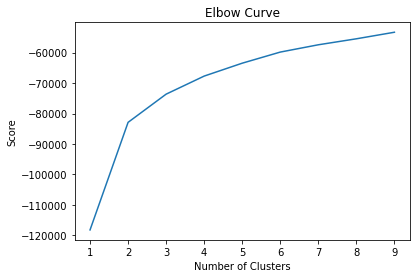

In [18]:
# Visualize the number of clusters

pl.plot(num_cl,kscore)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**Comment**

Chosen k-mean cumber: 4

Although a clearer elbow can be seen at the '2' level, I chose 4 because there is also an with a considerable rise between 2 and 4. After 4, the elbows rise gradually.

## 4. K-means algorithm

In [19]:
#create kmeans object

kmeans = KMeans(n_clusters = 4)

In [20]:
#fit the kmeans object
#actual culsters are created here.

kmeans.fit(df_num)

KMeans(n_clusters=4)

In [22]:
#add clusters to dataframe

df_num['cluster'] = kmeans.fit_predict(df_num)

<ipython-input-22-41d6c947a3b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['cluster'] = kmeans.fit_predict(df_num)


In [23]:
df_num.head()

,teaching_hospital_desc,sex_male,sex_female,sex_unk,age_01_09,age_10_19,age_20_29,age_30_39,age_40_49,age_50_59,...,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit,cluster
0,-0.318155,-0.947669,-0.898527,-0.441543,-0.623005,-0.858213,-0.803799,-0.790441,-0.704622,-0.777343,...,-0.735188,0.657574,-0.595749,-0.904502,-0.200066,-0.876349,-0.751841,-0.697350,-0.928700,3
1,-0.318155,-0.203750,0.054881,-0.441543,-0.658985,-0.541583,0.542599,0.188908,0.159937,0.291728,...,-0.170384,0.123938,0.242125,-0.904502,-0.188849,0.103147,-0.635296,0.029625,-0.063119,0
2,-0.318155,0.348853,-0.122697,-0.191402,3.167221,1.673876,-1.294318,-1.358838,-1.369333,-1.361613,...,-1.253163,0.093100,-0.438654,-0.904502,0.644019,-0.204603,1.069584,0.211580,0.092097,3
3,-0.318155,-0.282218,-0.142476,-0.441543,-0.303811,-0.305705,-0.042069,-0.068565,-0.008258,-0.028412,...,-0.033513,-0.232377,-0.124463,-0.904502,-0.065461,-0.104170,-0.512156,0.087960,-0.207723,0
4,3.143127,2.026521,1.026759,-0.441543,-0.648257,-0.319749,2.246270,2.419631,3.448115,3.605450,...,-0.412143,11.506925,-0.859103,-0.904502,3.074383,1.225482,1.389995,0.649829,1.493045,1


In [24]:
df_num['cluster'].value_counts(dropna = False)

3    1354
0    1134
1     359
2      36
Name: cluster, dtype: int64

## 5. K-means Viz and Comments

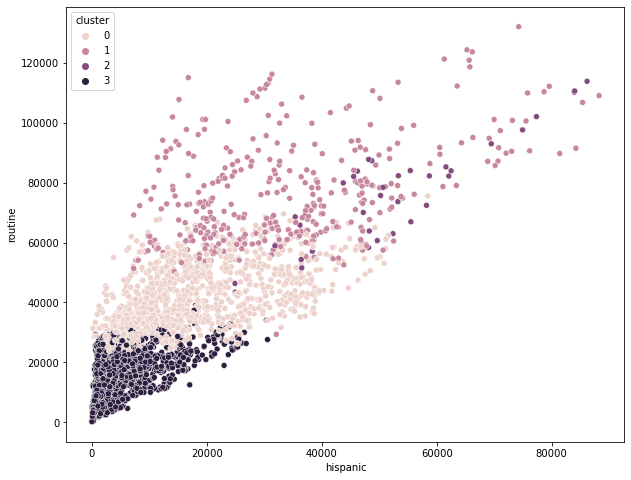

In [28]:
#plot clusters using value label from original df

plt.figure(figsize = (10,8))

ax = sns.scatterplot(x = df['hispanic'], y = df['routine'], hue = df_num['cluster']);

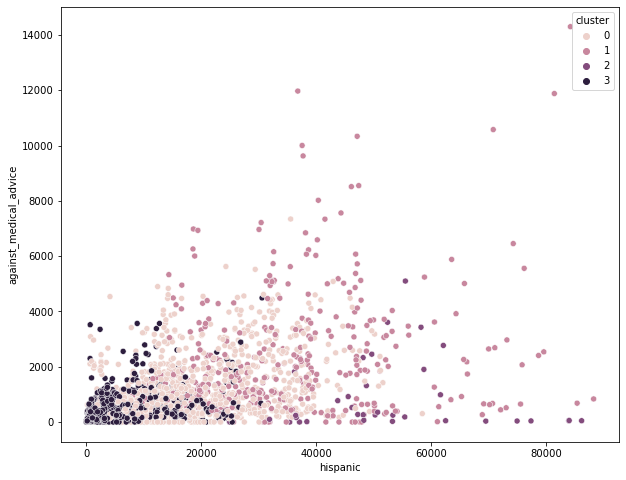

In [30]:
plt.figure(figsize = (10,8))

ax = sns.scatterplot(x = df['hispanic'], y = df['against_medical_advice'], hue = df_num['cluster']);

**Comment**

On a facility level, the clusters seem to make sense when considering patient encounters. The first chart has more defined clusters than the second chart. The clusters seem to resemble 3 hospital types with 3 different range of encounters with hispanic patients.

In [26]:
# df_num.loc[df_num['cluster'] == 2, 'cluster'] = 'purple'
# df_num.loc[df_num['cluster'] == 1, 'cluster'] = 'pink'
# df_num.loc[df_num['cluster'] == 0, 'cluster'] = 'yellow'

C:\Users\ncvc04\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [54]:
df_num.columns

Index(['teaching_hospital_desc', 'sex_male', 'sex_female', 'sex_unk',
       'age_01_09', 'age_10_19', 'age_20_29', 'age_30_39', 'age_40_49',
       'age_50_59', 'age_60_69', 'age_70_79', 'age_80_', 'age_under_1',
       'age_unknown', 'asian_pacific_island', 'black', 'hispanic',
       'native_american_eski', 'other_race', 'unknown_race', 'white',
       'acute_care', 'against_medical_advice', 'died', 'hospice_care',
       'home_health_service', 'residential_care', 'routine',
       'psychiatric_care', 'sn_ic_care', 'medi_cal', 'medicare', 'other_payer',
       'private_coverage', 'selfpay', 'all_other', 'english', 'spanish',
       'ed_admit', 'ed_visit', 'cluster'],
      dtype='object')

In [31]:
df['cluster'] = df_num['cluster'].copy()

**Comment**

Similar to the first cluster chart, the facilities *yellow* group has the highest patient encounters, followed by *pink* facilities, then the *purple* group of facilities. Based on the results, possible names for the clusters can be **"Low encounters", "Medium encounters" and "High encounters"**. However, for high encounters, there two seperate types of facilities exist relating to hispanic patients and routine visits. This forth *purple* cluster will be tentatively named **Mid to High Encounters**.

For future analysis, the results can be used to compare the clusters to the previously established categorical variables such as *licensed bed sizes* and *er service level*. In time series analysis, the encounters for each cluster can be aggregated and displayed yearly over time to predict the encounters for each cluster for the year 2021. 

In [32]:
#further investigate the meaning of the clusters found

from tabulate import tabulate

g = df.groupby(['cluster']).agg({'hispanic':['mean', 'median'],
                                 'white':['mean', 'median'],
                                 'black':['mean', 'median'],
                                'routine':['mean', 'median'],
                                'against_medical_advice':['mean', 'median'],
                                'died':['mean', 'median'],
                                'selfpay':['mean', 'median']})

round(g)

hispanic             white             black          routine  \
            mean   median     mean   median     mean  median     mean   
cluster                                                                 
0        17802.0  15162.0  17369.0  16305.0   5153.0  3054.0  42240.0   
1        34350.0  32192.0  29764.0  30187.0  12085.0  9245.0  76865.0   
2        52131.0  49936.0  18148.0  15698.0   3556.0  3950.0  76250.0   
3         5491.0   3526.0   7972.0   6601.0   1228.0   496.0  15426.0   

                 against_medical_advice           died        selfpay          
          median                   mean  median   mean median    mean  median  
cluster                                                                        
0        40696.0                 1116.0   758.0   67.0   62.0  2917.0  2878.0  
1        73815.0                 2357.0  1702.0  118.0  112.0  5766.0  5296.0  
2        77024.0                  845.0   244.0    6.0    5.0  1656.0  1416.0  
3        15570.0                  385.0   245.0   25.0   20.0   998.0   780.0

In [46]:
# check the clusters on a county level

g = df.groupby(['cluster']).agg({'county_number':'unique',
                                'licensed_bed_size':'unique'}).reset_index()
round(g)

,cluster,county_number,licensed_bed_size
0,0,"[1, 4, 7, 10, 13, 15, 19, 20, 24, 27, 30, 31, ...","[300-499, 150-199, 200-299, 100-149, 500+, 50-..."
1,1,"[1, 10, 16, 19, 30, 31, 33, 34, 36, 37, 43, 50...","[300-499, 200-299, 500+, 100-149, 150-199, 50-99]"
2,2,"[19, 20, 30, 37]","[500+, 300-499, 200-299]"
3,3,"[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 1...","[100-149, 150-199, 200-299, 50-99, 1-49, 300-499]"


In [47]:
dict(g['county_number'])

{0: array([ 1,  4,  7, 10, 13, 15, 19, 20, 24, 27, 30, 31, 33, 34, 36, 37, 38,
        39, 41, 42, 43, 44, 45, 48, 49, 50, 54, 56, 58, 40, 21, 55],
       dtype=int64),
 1: array([ 1, 10, 16, 19, 30, 31, 33, 34, 36, 37, 43, 50, 24, 39, 15,  7, 38,
        54, 58], dtype=int64),
 2: array([19, 20, 30, 37], dtype=int64),
 3: array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 17, 18, 19,
        21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
        38, 39, 40, 41, 42, 43, 44, 45, 47, 48, 49, 50, 52, 53, 54, 55, 56,
        57, 20], dtype=int64)}

In [60]:
df['cluster'] = df_num['cluster'].copy()

In [58]:
# df.loc[df_num['cluster'] == 2, 'cluster'] = 'Medium Encounters'
# df.loc[df_num['cluster'] == 1, 'cluster'] = 'Low Encounters'
# df.loc[df_num['cluster'] == 0, 'cluster'] = 'High Encounters'

In [61]:
df.head(3)

,year,oshpd_id,county_number,county_name,facility_name,dba_address1,dba_city,dba_zip_code,license_category_desc,teaching_hospital_desc,...,medicare,other_payer,private_coverage,selfpay,all_other,english,spanish,ed_admit,ed_visit,cluster
0,2012,106010735,1,Alameda,ALAMEDA HOSPITAL,2070 CLINTON,ALAMEDA,94501,General Acute Care,0.0,...,2740.0,3469.0,4339.0,0.0,522.0,12918.0,287.0,2595.0,13727.0,3
1,2012,106010739,1,Alameda,ALTA BATES SUMMIT MEDICAL CENTER-ALTA BATES CA...,2450 ASHBY STREET,BERKELEY,94705,General Acute Care,0.0,...,5707.0,1877.0,12926.0,0.0,534.0,33867.0,941.0,6047.0,35342.0,0
2,2012,106010776,1,Alameda,CHILDRENS HOSPITAL AND RESEARCH CENTER AT OAKLAND,747 52ND STREET,OAKLAND,94609,General Acute Care,0.0,...,19.0,1785.0,5949.0,0.0,1425.0,27285.0,10508.0,6911.0,39218.0,3


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2883 entries, 0 to 2882
Data columns (total 53 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2883 non-null   int64  
 1   oshpd_id                2883 non-null   int64  
 2   county_number           2883 non-null   int64  
 3   county_name             2883 non-null   object 
 4   facility_name           2883 non-null   object 
 5   dba_address1            2883 non-null   object 
 6   dba_city                2883 non-null   object 
 7   dba_zip_code            2883 non-null   int64  
 8   license_category_desc   2883 non-null   object 
 9   teaching_hospital_desc  2883 non-null   float64
 10  licensed_bed_size       2883 non-null   object 
 11  er_service_level        2883 non-null   object 
 12  sex_male                2883 non-null   float64
 13  sex_female              2883 non-null   float64
 14  sex_unk                 2883 non-null   

In [64]:
df.to_csv(os.path.join(data_path,'Prepared', '5.facilities_clusters.csv'), index = 0)